# Fast graph operations module

This is a set of functions to convert MultiDiGraphs from OSMnx into iGraph objets and conduct faster computations for slow functions such as betweenness and closeness centralities

In [1]:
import osmnx as ox
import networkx as nx
from tools import fast_ops

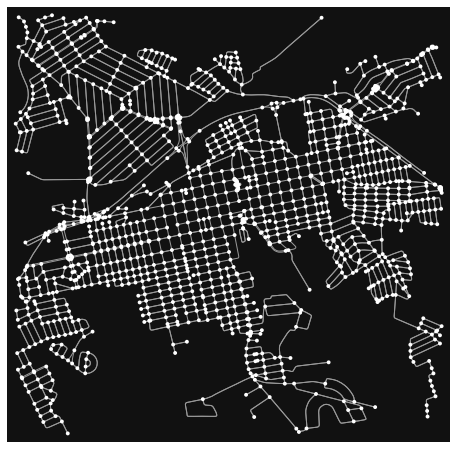

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
#Get sample graph
G = ox.graph_from_address('Monte Alto, SP, Brazil',dist=2000)
ox.plot_graph(G)

In [3]:
print('Betweenness on NetworkX:')
%timeit nx.edge_betweenness(G,weight='length')
print('Betweenness on iGraph:')
%timeit fast_ops.fast_betweenness(G,weight='length',kind='edge')

Betweenness on NetworkX:
15.6 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Betweenness on iGraph:
437 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
print('Closeness on NetworkX:')
%timeit nx.closeness_centrality(G,distance='length')
print('Betweenness on iGraph:')
%timeit fast_ops.fast_closeness(G,weight='length')

Closeness on NetworkX:
7.76 s ± 30.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Betweenness on iGraph:
259 ms ± 3.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
#returns same structure as NetworkX
betweenness = fast_ops.fast_betweenness(G,weight='length')
nx.set_edge_attributes(G,betweenness,'betweenness')

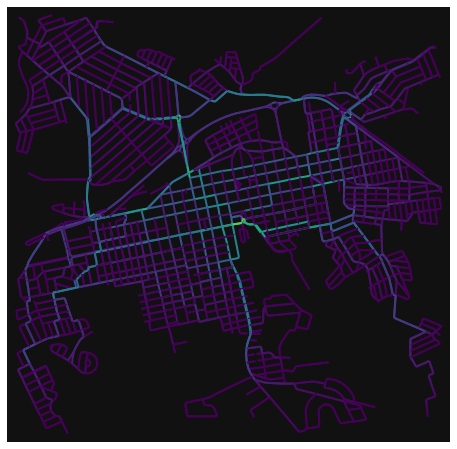

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
colors = ox.plot.get_edge_colors_by_attr(G,'betweenness')
ox.plot_graph(G,edge_color=colors,
              node_size=0,edge_linewidth=2)